In [28]:
import pandas as pd
import sketch

df = pd.read_csv("https://raw.githubusercontent.com/Sven-Bo/datasets/master/supermarket_sales.csv")

In [2]:
print(df.head())

    Invoice ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2021   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2021   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2021   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2021   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2021   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

# .ask

In [3]:
df.sketch.ask("What is this dataset about?")

In [9]:
df.sketch.ask("What interesting analysis can we perform on this dataset ? (format as a html list) ")

In [8]:
df.sketch.ask("Can you give me friendly names and one line descriptions of each column ? format as a HTML list")

In [11]:
df.sketch.ask("Analyze the relationship between rating and total sale. Format answer as HTML paragraphs")

# .howto

In [17]:
df.sketch.howto("Analyze the relationship between rating and total sale.")

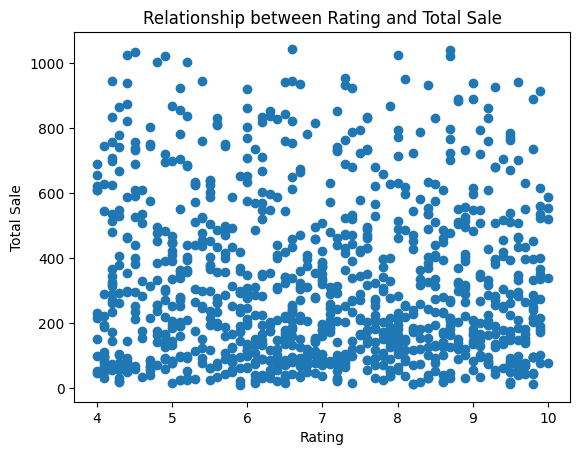

Correlation coefficient between rating and total sale: -0.03644170499701834
Mean total sale for each rating category:
 Rating
4.0     362.410364
4.1     211.128441
4.2     421.632273
4.3     331.006083
4.4     395.092147
           ...    
9.6     328.956353
9.7     238.028250
9.8     261.943500
9.9     363.933281
10.0    416.070900
Name: Total, Length: 61, dtype: float64


In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between rating and total sale
plt.scatter(df['Rating'], df['Total'])

# Add labels and title to the plot
plt.xlabel('Rating')
plt.ylabel('Total Sale')
plt.title('Relationship between Rating and Total Sale')

# Show the plot
plt.show()

# Calculate the correlation coefficient between rating and total sale
corr = df['Rating'].corr(df['Total'])
print("Correlation coefficient between rating and total sale:", corr)

# Calculate the mean total sale for each rating category
mean_total = df.groupby('Rating')['Total'].mean()
print("Mean total sale for each rating category:\n", mean_total)


In [19]:
df.sketch.howto("Calculate the product lines with the highest profit")

In [20]:
# Calculate the total profit for each product line
df['Total Profit'] = df['Total'] - df['cogs'] - df['gross income']

# Group the dataframe by product line and sum the total profit for each group
profit_by_product_line = df.groupby('Product line')['Total Profit'].sum()

# Sort the results in descending order to find the product lines with the highest profit
profit_by_product_line.sort_values(ascending=False, inplace=True)

# Print the top 3 product lines with the highest profit
print("Product lines with the highest profit:")
print(profit_by_product_line.head(3))


Product lines with the highest profit:
Product line
Home and lifestyle     4.749534e-13
Fashion accessories    3.370637e-13
Health and beauty     -1.932898e-13
Name: Total Profit, dtype: float64


In [22]:
df.sketch.howto("Create a plot to show sales by Gender")

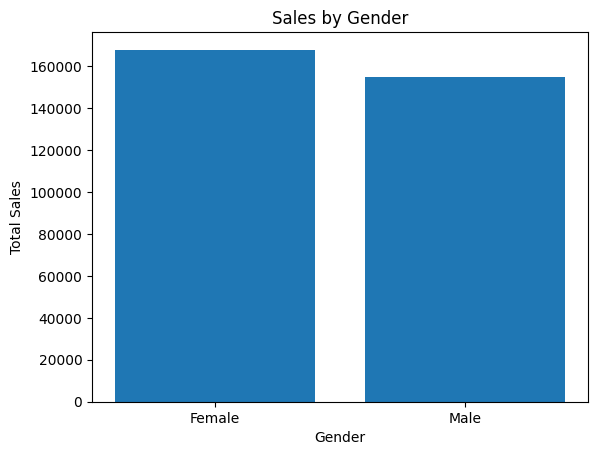

In [23]:
import matplotlib.pyplot as plt

# Group the dataframe by Gender and sum the Total column
gender_sales = df.groupby('Gender')['Total'].sum()

# Create a bar plot to visualize the sales by Gender
plt.bar(gender_sales.index, gender_sales.values)

# Add labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Sales by Gender')

# Display the plot
plt.show()


In [24]:
df.sketch.howto("Create a plot. to show sales by month")

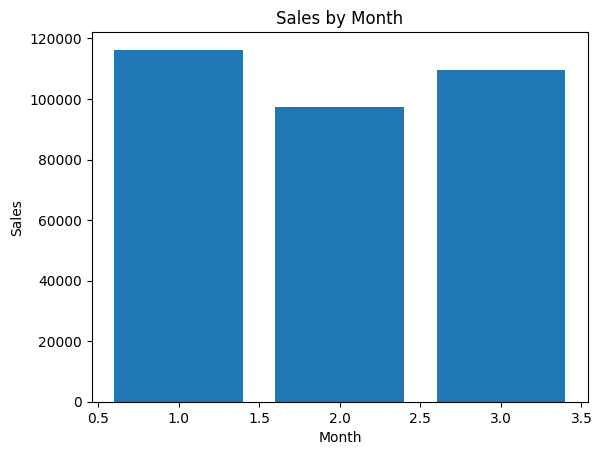

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for month
df['Month'] = df['Date'].dt.month

# Group the data by month and sum the Total column
monthly_sales = df.groupby('Month')['Total'].sum()

# Create a bar plot to visualize the sales by month
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()


In [26]:
df.sketch.howto("Plot the total sales by each hour of the day")

/tmp/ipykernel_13242/2655851607.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


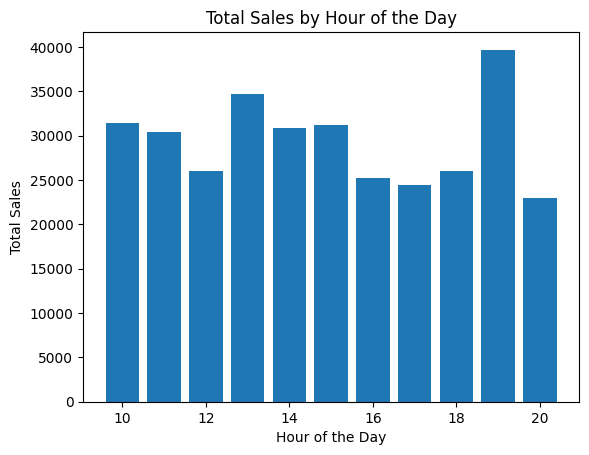

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Create a new column for hour of the day
df['Hour'] = df['Time'].dt.hour

# Group the dataframe by hour and sum the 'Total' column
hourly_sales = df.groupby('Hour')['Total'].sum()

# Plot the total sales by hour
plt.bar(hourly_sales.index, hourly_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of the Day')
plt.show()
